# Project: Graph of ...

In [1]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import ssl
import requests

%matplotlib inline

## Get Data

Data source: Open-Meteo (https://open-meteo.com/). Generated using Copernicus Climate Change Service information (2022). ERA5 data: Hersbach et al. (2018), doi: 10.24381/cds.adbb2d47. ERA5-Land data: Muñoz Sabater (2019), doi: 10.24381/cds.e2161bac. CERRA data: Schimanke et al. (accessed 2022-12-31), doi: 10.24381/cds.622a565a.


Rosario, Santa Fe, Argentine

In [2]:
# API endpoints rosario_argentina

base_endpoint = "https://archive-api.open-meteo.com/v1/archive?latitude=-32.95&longitude=-60.64&start_date=YYYY-01-01&end_date=YYYY-12-31&hourly=temperature_2m"
endpoints = {}

for year in ('1990', '2000', '2010', '2020'):
    endpoints[year] = base_endpoint.replace('YYYY', year)

In [3]:
# Get data
raw_data = {}
for year, url in endpoints.items():
    response = requests.get(url)

    if response.status_code == 200:
        raw_data[year] = response.json()
        print(year)
        print(raw_data[year].keys())
    else:
        print(f"Error: {response.status_code}")

1990
dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])
2000
dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])
2010
dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])
2020
dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


## Clean and organize dataframe

In [4]:
# Convert the dictionaries to DataFrames and merge them
df_rosario_1990 = pd.DataFrame(raw_data['1990']['hourly'])
df_rosario_2000 = pd.DataFrame(raw_data['2000']['hourly'])
df_rosario_2010 = pd.DataFrame(raw_data['2010']['hourly'])
df_rosario_2020 = pd.DataFrame(raw_data['2020']['hourly'])

print(df_rosario_1990.columns)
print(df_rosario_2000.columns)
print(df_rosario_2010.columns)
print(df_rosario_2020.columns)

Index(['time', 'temperature_2m'], dtype='object')
Index(['time', 'temperature_2m'], dtype='object')
Index(['time', 'temperature_2m'], dtype='object')
Index(['time', 'temperature_2m'], dtype='object')


In [5]:
print(df_rosario_1990['time'].dtype)
print(df_rosario_2000['time'].dtype)
print(df_rosario_2010['time'].dtype)
print(df_rosario_2020['time'].dtype)

object
object
object
object


In [6]:
df_rosario_1990.head()

,time,temperature_2m
0,1990-01-01T00:00,25.9
1,1990-01-01T01:00,25.4
2,1990-01-01T02:00,25.0
3,1990-01-01T03:00,24.5
4,1990-01-01T04:00,24.0


In [7]:
df_rosario_2000.head()

,time,temperature_2m
0,2000-01-01T00:00,26.2
1,2000-01-01T01:00,25.0
2,2000-01-01T02:00,24.2
3,2000-01-01T03:00,23.3
4,2000-01-01T04:00,22.3


In [8]:
df_rosario_2010.head()

,time,temperature_2m
0,2010-01-01T00:00,23.0
1,2010-01-01T01:00,22.2
2,2010-01-01T02:00,21.7
3,2010-01-01T03:00,21.2
4,2010-01-01T04:00,20.9


In [9]:
df_rosario_2020.head()

,time,temperature_2m
0,2020-01-01T00:00,26.0
1,2020-01-01T01:00,25.3
2,2020-01-01T02:00,24.8
3,2020-01-01T03:00,24.3
4,2020-01-01T04:00,23.7


In [10]:
df_combined = pd.concat([df_rosario_1990['temperature_2m'], 
                         df_rosario_2000['temperature_2m'], 
                         df_rosario_2010['temperature_2m'], 
                         df_rosario_2020['temperature_2m']], axis=1)

df_combined.columns = ['1990', '2000', '2010', '2020']

df_combined.reset_index(drop=True, inplace=True)
df_combined.head()

,1990,2000,2010,2020
0,25.9,26.2,23.0,26.0
1,25.4,25.0,22.2,25.3
2,25.0,24.2,21.7,24.8
3,24.5,23.3,21.2,24.3
4,24.0,22.3,20.9,23.7


In [11]:
list(df_combined.columns)

['1990', '2000', '2010', '2020']

In [12]:
df_combined.columns

Index(['1990', '2000', '2010', '2020'], dtype='object')

## Graph the data

In [13]:
# Imports specific to this graph
import matplotlib.dates as mdates

In [14]:
temp_1990 = df_combined['1990']
temp_2000 = df_combined['2000']
temp_2010 = df_combined['2010']
temp_2020 = df_combined['2020']


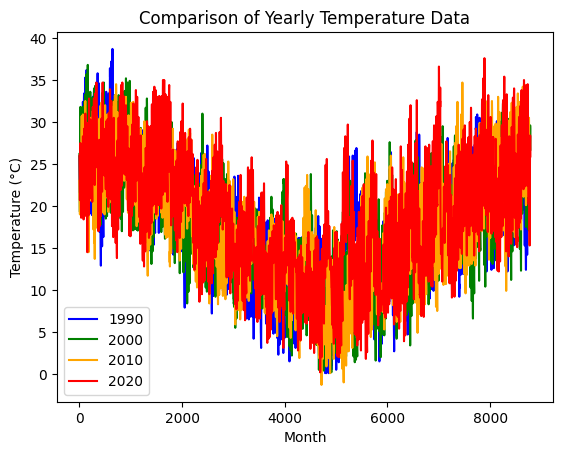

In [15]:
plt.plot(temp_1990.index, temp_1990, color='blue', label='1990')
plt.plot(temp_2000.index, temp_2000, color='green', label='2000')
plt.plot(temp_2010.index, temp_2010, color='orange', label='2010')
plt.plot(temp_2020.index, temp_2020, color='red', label='2020')

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Comparison of Yearly Temperature Data')
plt.legend()

plt.show()


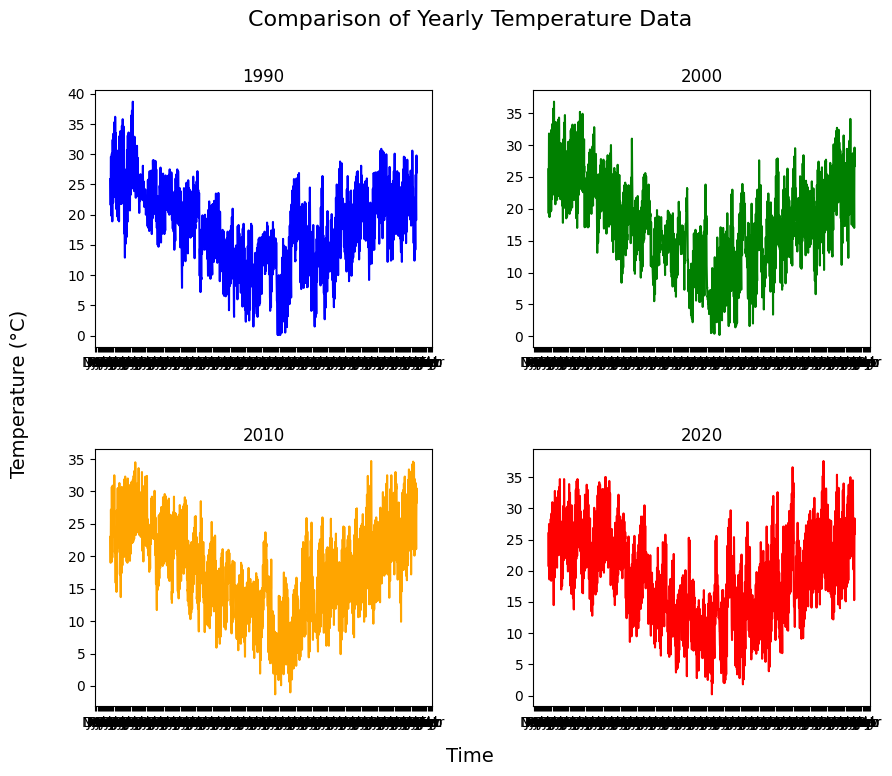

In [16]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot each year's temperature data in a separate subplot
axs[0, 0].plot(df_combined.index, df_combined['1990'], color='blue')
axs[0, 0].set_title('1990')
axs[0, 1].plot(df_combined.index, df_combined['2000'], color='green')
axs[0, 1].set_title('2000')
axs[1, 0].plot(df_combined.index, df_combined['2010'], color='orange')
axs[1, 0].set_title('2010')
axs[1, 1].plot(df_combined.index, df_combined['2020'], color='red')
axs[1, 1].set_title('2020')

# Set x-axis ticks to monthly intervals
for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Set overall title and axis labels
fig.suptitle('Comparison of Yearly Temperature Data', fontsize=16)
fig.text(0.5, 0.04, 'Time', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Temperature (°C)', va='center', rotation='vertical', fontsize=14)

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Show the plot
plt.show()


## Conclusions


The data suggests...